
**KELOMPOK 1 BIG DATA**

*   Stacyana Jesika Surianto
*   Suci Ramadhani
*   Wahyu Ardiantito
*   Willy Pramudia Ananta



# Ekstraksi Fitur Menggunakan LBP

In [ ]:
#Import libraries
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

In [ ]:
def compute_lbp(arr):
    radius = 2
    n_points = 16 * radius
    n_bins = n_points + 2
    lbp = local_binary_pattern(arr, n_points, radius, 'uniform')
    lbp = lbp.ravel()  # Mengubah bentuk array menjadi 1 dimensi
    feature = np.zeros(n_bins)
    for i in lbp:
        feature[int(i)] += 1
    feature /= np.linalg.norm(feature, ord=1)  # Normalisasi dengan L1
    return feature

In [ ]:
#Melakukan ekstraksi fitur dengan LBP
Categories=['meningioma_tumor','no_tumor','pituitary_tumor']
target_arr=[] #List of output array
vec=[] #List of features array
#Load data
datadir='/content/drive/MyDrive/DATASET_BIGDATA/Tumor_dataset'


for i in Categories:
    print(f'loading... category: {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        if os.path.join(path, img).endswith('.jpg'):
            img_array = imread(os.path.join(path, img), as_gray=True)
            img_resized = resize(img_array, (256, 256))
            feature = compute_lbp(img_resized)
            vec.append(feature)
            target_arr.append(Categories.index(i))
    print(f'loaded category: {i} successfully')

loading... category: meningioma_tumor
loaded category: meningioma_tumor successfully
loading... category: no_tumor
loaded category: no_tumor successfully
loading... category: pituitary_tumor
loaded category: pituitary_tumor successfully


In [ ]:
#Mengambil data hasil ekstraksi fitur
data=np.array(vec)
target=np.array(target_arr)

In [ ]:
#Menghitung baris dan kolom data setelah di ekstraksi fitur
np.shape(data)

(2044, 34)

In [ ]:
# Merubah array ke dataframe
df = pd.DataFrame(data)
df['Target']=target#Menambahkan kolom Target

df.to_csv('/content/drive/MyDrive/DATASET_BIGDATA/model_best2(16n,2r).csv', index=False, header=True)

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Target
0,0.029953,0.009033,0.007675,0.010620,0.010696,0.008865,0.008942,0.008774,0.008011,0.009445,...,0.008316,0.008560,0.010056,0.010544,0.011154,0.008514,0.009842,0.357635,0.162888,0
1,0.038284,0.011444,0.009567,0.011673,0.011551,0.010605,0.008682,0.008301,0.008148,0.008789,...,0.009399,0.008392,0.008560,0.010315,0.011414,0.009537,0.012482,0.309265,0.204285,0
2,0.038467,0.011490,0.008820,0.011002,0.010483,0.009720,0.009094,0.008575,0.008072,0.009506,...,0.009262,0.008484,0.009430,0.010025,0.011765,0.009064,0.012726,0.306152,0.203003,0
3,0.028763,0.009262,0.006882,0.010590,0.009674,0.009521,0.008698,0.008224,0.009003,0.009293,...,0.008072,0.008514,0.008392,0.009171,0.010803,0.008530,0.009354,0.345245,0.162506,0
4,0.032425,0.009781,0.007187,0.013153,0.009857,0.010010,0.009003,0.008896,0.010193,0.011978,...,0.009277,0.009506,0.011322,0.011703,0.012543,0.008606,0.011551,0.261581,0.176605,0


# Klasifikasi menggunakan SVM

In [ ]:
new_df=pd.read_csv('/content/drive/MyDrive/DATASET_BIGDATA/model_best2(8n,1r).csv')
new_df.head(5)

,0,1,2,3,4,5,6,7,8,9,Target
0,0.026428,0.040924,0.038940,0.087860,0.173294,0.122345,0.042160,0.042175,0.374237,0.051636,0
1,0.032852,0.051422,0.041702,0.090118,0.180573,0.122879,0.046616,0.049957,0.320404,0.063477,0
2,0.033142,0.051605,0.041855,0.090042,0.179626,0.122253,0.047302,0.050400,0.319153,0.064621,0
3,0.024841,0.042023,0.039078,0.089249,0.181351,0.129807,0.041916,0.040161,0.359085,0.052490,0
4,0.023773,0.043350,0.038040,0.103088,0.198990,0.163055,0.045624,0.048080,0.287964,0.048035,0


In [ ]:
#Mendefinisikan variabel dependent dan independent
x=new_df.iloc[:,:-1] #input data
y=new_df.iloc[:,-1] #output data

In [ ]:
#Mendefinisikan fungsi SVM
from sklearn import svm
svc=svm.SVC(C=50, kernel = 'rbf', probability=True)

In [ ]:
#Membagi data training dan testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=77, stratify = y)
print('Splitted Successfully')
#Melatih data training dengan SVM
svc.fit(x_train,y_train)
print('The Model is trained well with the given images')

Splitted Successfully
The Model is trained well with the given images


In [ ]:
from collections import Counter

# Assuming you have the y_train array containing the labels
label_counts = Counter(y_test)

# Print the count of each label
for label, count in label_counts.items():
    print(f"Label {label} = {count}")

Label 0 = 164
Label 1 = 79
Label 2 = 166


In [ ]:
len(x_train)

1635

In [ ]:
len(x_test)

409

In [ ]:
#Melakukan prediksi dengan SVM
from sklearn.metrics import accuracy_score
y_pred1=svc.predict(x_test)
print("The predicted Data is :")
print(y_pred1)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred1,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 2 2 0 0 0 2 2 0 0 2 0 2 1 2 1 1 0 2 2 1 1 1 0 1 0 0 2 2 2 2 1 0 1 2
 1 2 2 1 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 1 0 0 2 2 2 2 1 0 2 0 0 2 2 0 0 1 2
 2 1 2 1 0 0 0 0 2 1 2 0 2 0 0 2 0 0 2 2 2 2 0 2 1 2 0 2 0 0 2 0 1 0 0 2 2
 1 2 0 2 0 0 1 0 1 2 2 2 0 0 0 2 1 2 1 0 2 1 2 2 2 2 2 0 0 2 2 2 2 1 2 0 1
 1 2 0 2 2 1 2 1 1 0 2 0 1 0 0 1 0 1 2 0 0 1 0 0 2 2 0 2 2 1 1 0 1 1 2 1 0
 2 1 1 1 0 2 0 1 0 1 1 2 0 0 2 0 2 1 1 2 0 0 1 2 1 0 2 2 2 1 2 0 2 1 2 2 0
 0 2 0 2 1 2 2 1 2 1 2 0 0 2 2 1 0 2 0 0 1 0 2 2 0 1 0 2 0 0 0 2 2 2 2 2 1
 2 1 2 0 2 2 2 2 2 1 0 2 0 2 2 0 2 2 1 2 2 1 2 0 2 1 0 2 2 1 2 2 0 1 1 2 2
 2 1 2 1 1 0 2 1 2 0 2 2 1 0 2 2 2 2 2 1 1 0 1 2 0 1 2 2 2 0 1 2 0 0 0 0 0
 0 1 0 2 1 2 0 0 2 0 0 0 0 2 0 2 0 0 2 2 2 1 0 0 0 0 0 0 2 1 0 0 2 2 2 0 0
 2 0 1 2 2 0 0 0 2 2 2 0 0 2 2 2 1 0 2 2 0 1 2 2 2 1 0 0 1 2 2 1 0 2 1 2 2
 2 2]
The actual data is:
[0 0 1 2 2 0 2 0 2 2 0 1 2 0 0 1 2 1 0 0 2 2 1 1 1 0 1 0 0 2 2 2 2 1 2 1 2
 0 2 2 1 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 1 0 0 2 2 2

In [ ]:
#Menghitung akurasi, precision, recall, f1-score
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       164
           1       0.77      0.86      0.81        79
           2       0.90      0.97      0.93       166

    accuracy                           0.88       409
   macro avg       0.86      0.87      0.87       409
weighted avg       0.88      0.88      0.88       409



<Axes: >

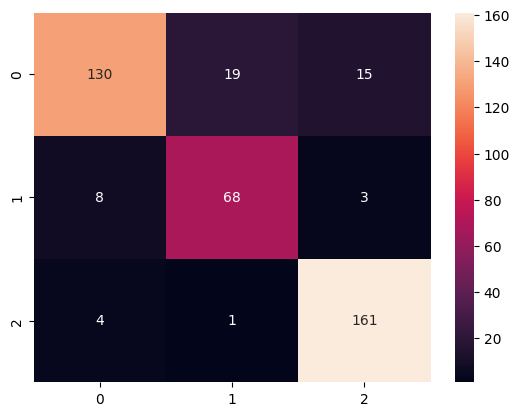

In [ ]:
# Matrix Confusion
import seaborn as sns
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm, annot=True, fmt="d")

# Uji Coba dengan data Input

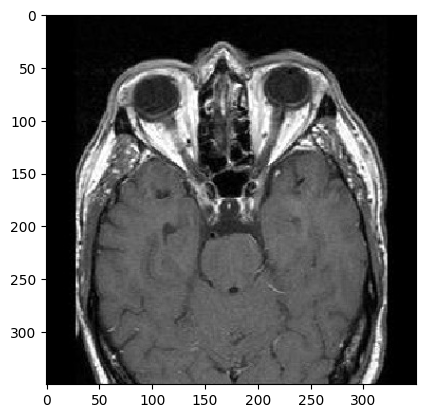

meningioma_tumor = 11.084762188764072%
no_tumor = 76.40861298578831%
pituitary_tumor = 12.506624825447632%
The predicted image is : no_tumor


In [ ]:
import warnings
#Uji coba SVM (1)
path='/content/drive/MyDrive/DATASET_BIGDATA/tumor_dataset/no_tumor/1.jpg'
img=imread(path,as_gray=True)
plt.imshow(img,cmap='gray')
plt.show()
img_resize=resize(img,(256,256))
l=compute_lbp(img_resize)
L=l.reshape(1, -1)
probability=svc.predict_proba(L)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    warnings.filterwarnings("ignore")
print("The predicted image is : "+Categories[svc.predict(L)[0]])

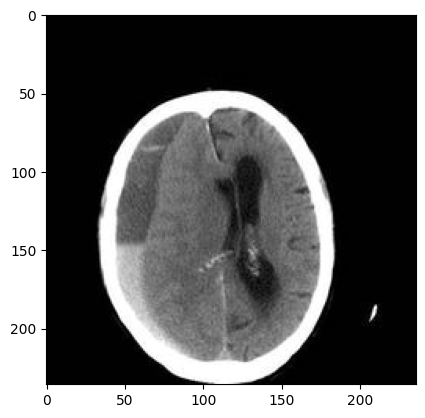

meningioma_tumor = 1.4612652223087523%
no_tumor = 98.5387287625993%
pituitary_tumor = 6.015091931913385e-06%
The predicted image is : no_tumor


In [ ]:
#Uji coba SVM (2)
path='/content/drive/MyDrive/Testing/no_tumor/image(1).jpg'
img=imread(path,as_gray=True)
plt.imshow(img,cmap='gray')
plt.show()
img_resize=resize(img,(256,256))
l=compute_lbp(img_resize)
L=l.reshape(1, -1)
probability=svc.predict_proba(L)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    warnings.filterwarnings("ignore")
print("The predicted image is : "+Categories[svc.predict(L)[0]])

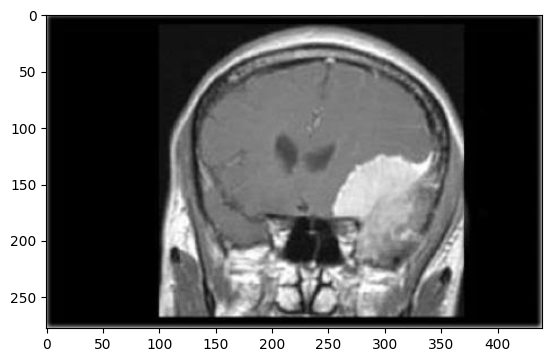

meningioma_tumor = 56.422245809203076%
no_tumor = 35.57049837577939%
pituitary_tumor = 8.007255815017515%
The predicted image is : meningioma_tumor


In [ ]:
#Uji coba SVM (3)
path='/content/drive/MyDrive/Testing/meningioma_tumor/image(1).jpg'
img=imread(path,as_gray=True)
plt.imshow(img,cmap='gray')
plt.show()
img_resize=resize(img,(256,256))
l=compute_lbp(img_resize)
L=l.reshape(1, -1)
probability=svc.predict_proba(L)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    warnings.filterwarnings("ignore")
print("The predicted image is : "+Categories[svc.predict(L)[0]])